# **KAFH System simulation using VQC**

---



##### Downloading dependencies and libraries

In [ ]:
# installs
#qiskit ---
"""
!pip install 'qiskit>=1' jupyterlab pandas matplotlib
!pip install 'qiskit[all]'
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install -U qiskit-aer
!pip install qiskit-algorithms
"""
#pennylane ---
!pip install pennylane

#graph ---
!pip install netket networkx tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.1/641.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.4/872.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 629.9 kB/s eta 0:00:00
  Attempting uninstall: optax
    Found existing installation: optax 0.2.1
    Uninstalling optax-0.2.1:
      Successfully uninstalled optax-0.2.1


In [ ]:
"""# qiskit
#from qiskit_ibm_runtime import QiskitRuntimeService, IBMProvider
from qiskit_algorithms.minimum_eigensolvers import VQE, QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.time_evolvers import TimeEvolutionProblem, TrotterQRTE
from qiskit_algorithms import Grover
from qiskit_algorithms import IterativeAmplitudeEstimation, IterativePhaseEstimation
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator, Sampler
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import *
# qiskit algorithms migration guide - https://docs.quantum.ibm.com/api/migration-guides/qiskit-algorithms-module
# qiskit runtime migration - https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime-from-provider"""

'# qiskit\n#from qiskit_ibm_runtime import QiskitRuntimeService, IBMProvider\nfrom qiskit_algorithms.minimum_eigensolvers import VQE, QAOA, NumPyMinimumEigensolver\nfrom qiskit_algorithms.time_evolvers import TimeEvolutionProblem, TrotterQRTE\nfrom qiskit_algorithms import Grover\nfrom qiskit_algorithms import IterativeAmplitudeEstimation, IterativePhaseEstimation\nfrom qiskit_algorithms.optimizers import SPSA, COBYLA\nfrom qiskit.circuit.library import TwoLocal\nfrom qiskit.quantum_info import SparsePauliOp\nfrom qiskit.primitives import Estimator, Sampler\nfrom qiskit_aer.primitives import Estimator as AerEstimator\nfrom qiskit_aer.primitives import Sampler as AerSampler\nfrom qiskit.circuit import QuantumCircuit\nfrom qiskit_aer import AerSimulator\nfrom qiskit_aer.noise import NoiseModel\nfrom qiskit.visualization import *\n# qiskit algorithms migration guide - https://docs.quantum.ibm.com/api/migration-guides/qiskit-algorithms-module\n# qiskit runtime migration - https://docs.quan

In [ ]:
# Pennylane
import pennylane.numpy as np
import pennylane as qml
from pennylane import qchem

In [ ]:
# for graphs
import networkx as nx
import matplotlib.pyplot as plt

##### Define the KAFH System Graph

$
\\
\mathrm{Hamiltonian} = \sum_{\langle i, j \rangle} \vec{S_i} . \vec{S_j}\\ (i,j \, \mathrm{are} \, \mathrm{neighbours})\\
\therefore \,\, H = \sum_{\langle i, j \rangle} \vec{X_i} . \vec{X_j} + \vec{Y_i} . \vec{Y_j} + \vec{Z_i} . \vec{Z_j}
$

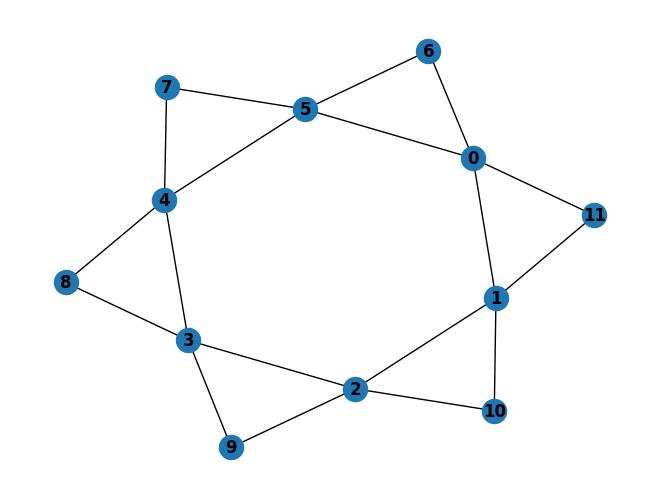

In [ ]:
graph = nx.Graph(((0, 1), (1, 2), (2, 3), (3, 4),(4,5),(5,0),(6,0),(6,5),(7,5),(7,4),(8,4),(8,3),(9,3),(9,2),(10,2),(10,1),(1,11),(11,0)))
nx.draw(graph, with_labels=True, font_weight='bold')

##### Creating the parameterized ansatz circuit

In [ ]:
from pennylane.qaoa import maxcut
hamiltonian_maxcut, hamiltonian_mixer = maxcut(graph)
print(type(hamiltonian_maxcut))

<class 'pennylane.ops.qubit.hamiltonian.Hamiltonian'>


Using Maxcut to find the hamiltonnian for the graph of our system.

The system we are using has trivial coupling since the ising-type hamiltonian has pauli coupling instead of fermionic operators which would require us an extra encoding step of the lattice points to perfectly mimic the system.

In [ ]:
print(hamiltonian_maxcut)

  (-9.0) [I0]
+ (0.5) [Z0 Z1]
+ (0.5) [Z0 Z5]
+ (0.5) [Z0 Z6]
+ (0.5) [Z0 Z11]
+ (0.5) [Z1 Z2]
+ (0.5) [Z1 Z10]
+ (0.5) [Z1 Z11]
+ (0.5) [Z2 Z3]
+ (0.5) [Z2 Z9]
+ (0.5) [Z2 Z10]
+ (0.5) [Z3 Z4]
+ (0.5) [Z3 Z8]
+ (0.5) [Z3 Z9]
+ (0.5) [Z4 Z5]
+ (0.5) [Z4 Z7]
+ (0.5) [Z4 Z8]
+ (0.5) [Z5 Z6]
+ (0.5) [Z5 Z7]


Hardcoding the X and Y couplings for our graph.

In [ ]:
obs = []
coeffs = []

for edge in graph.edges():
    coeffs.extend([1.0, 1.0, 1.0])
    obs.extend([qml.PauliX(edge[0]) @ qml.PauliX(edge[1]),
                        qml.PauliY(edge[0]) @ qml.PauliY(edge[1]),
                        qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])])
hamiltonian_heisenberg = qml.Hamiltonian(coeffs, obs)

The full paired hamiltonian is given below :

In [ ]:
print(hamiltonian_heisenberg)

  (1.0) [X0 X1]
+ (1.0) [Y0 Y1]
+ (1.0) [Z0 Z1]
+ (1.0) [X0 X5]
+ (1.0) [Y0 Y5]
+ (1.0) [Z0 Z5]
+ (1.0) [X0 X6]
+ (1.0) [Y0 Y6]
+ (1.0) [Z0 Z6]
+ (1.0) [X0 X11]
+ (1.0) [Y0 Y11]
+ (1.0) [Z0 Z11]
+ (1.0) [X1 X2]
+ (1.0) [Y1 Y2]
+ (1.0) [Z1 Z2]
+ (1.0) [X1 X10]
+ (1.0) [Y1 Y10]
+ (1.0) [Z1 Z10]
+ (1.0) [X1 X11]
+ (1.0) [Y1 Y11]
+ (1.0) [Z1 Z11]
+ (1.0) [X2 X3]
+ (1.0) [Y2 Y3]
+ (1.0) [Z2 Z3]
+ (1.0) [X2 X9]
+ (1.0) [Y2 Y9]
+ (1.0) [Z2 Z9]
+ (1.0) [X2 X10]
+ (1.0) [Y2 Y10]
+ (1.0) [Z2 Z10]
+ (1.0) [X3 X4]
+ (1.0) [Y3 Y4]
+ (1.0) [Z3 Z4]
+ (1.0) [X3 X8]
+ (1.0) [Y3 Y8]
+ (1.0) [Z3 Z8]
+ (1.0) [X3 X9]
+ (1.0) [Y3 Y9]
+ (1.0) [Z3 Z9]
+ (1.0) [X4 X5]
+ (1.0) [Y4 Y5]
+ (1.0) [Z4 Z5]
+ (1.0) [X4 X7]
+ (1.0) [Y4 Y7]
+ (1.0) [Z4 Z7]
+ (1.0) [X4 X8]
+ (1.0) [Y4 Y8]
+ (1.0) [Z4 Z8]
+ (1.0) [X5 X6]
+ (1.0) [Y5 Y6]
+ (1.0) [Z5 Z6]
+ (1.0) [X5 X7]
+ (1.0) [Y5 Y7]
+ (1.0) [Z5 Z7]


Check dimensions of hamiltonian vector space

In [ ]:
num_qubits = len(hamiltonian_heisenberg.wires)
print("Vector space dimension of the ansatz circuit must match that of the hamiltonian which is : ", num_qubits)

Vector space dimension of the ansatz circuit must match that of the hamiltonian which is :  12


*   Choose device to run the program in Pennylane.
*   Make a random variational circuit with 24 parameters for optimization.




In [ ]:
params = np.array([-np.pi/a for a in range(1,13)]+[np.pi/a for a in range(12,0,-1)])
params

tensor([-3.14159265, -1.57079633, -1.04719755, -0.78539816, -0.62831853,
        -0.52359878, -0.44879895, -0.39269908, -0.34906585, -0.31415927,
        -0.28559933, -0.26179939,  0.26179939,  0.28559933,  0.31415927,
         0.34906585,  0.39269908,  0.44879895,  0.52359878,  0.62831853,
         0.78539816,  1.04719755,  1.57079633,  3.14159265], requires_grad=True)

QML Devies/ Plugins options [here](https://pennylane.ai/plugins/)

In [ ]:
dev = qml.device("lightning.qubit", wires=num_qubits)

#making the variational ansatz
np.random.shuffle(params)
def ansatz(params):
  if(len(params) == 2*num_qubits):
    for i in range(0,len(params),2):
      qml.RY(params[i],wires=i//2)
      qml.RZ(params[i+1],wires=i//2)
    for i in range(num_qubits-1):
      qml.CNOT([i,i+1])


@qml.qnode(dev, interface="autograd")

SyntaxError: incomplete input (<ipython-input-1-917aa5dced15>, line 14)

**Drawing of our ansatz circuit**

In [ ]:
print(qml.draw(ansatz)(params))

**Cost function =  ⟨ψ|H|ψ⟩**

In [ ]:
def cost_fn(params):
    ansatz(params)
    return qml.expval(hamiltonian_heisenberg)

##### Optimization

In [ ]:
def opt_func(opt,params,max_iterations = 500 ,step_size = 0.1,conv_tol = 1e-05):

  gd_param_history = [params] #records the variation in the parameters
  gd_cost_history = [] #records the variation in the cost value

## looping until convergence -------------------
  for n in range(max_iterations):

    # Take step
    params, prev_energy = opt.step_and_cost(cost_fn, params) # update params and energy
    gd_param_history.append(params) # gd_param_history  -- list to store params for plotting
    gd_cost_history.append(prev_energy) # gd_cost_history -- list to store the energies for each optimization step
    energy = cost_fn(params) # stores current/ new energy value

    # Calculate difference between new and old energies
    conv = np.abs(energy - prev_energy)

    if n % 25 == 0:
      print("Iteration = {:}, Energy = {:.10f} Ha,  Convergence parameter = {:.8f} Ha".format(n, energy, conv))

    if conv <= conv_tol:
      break

  print("Loop ended at convergence value : ",conv)
  print("Final value of the energy = {:.8f} Ha".format(energy))
  print("Number of iterations = ", n)

  return  gd_cost_history

In [ ]:
max_iterations = 1000 # maximum iterations
opt_SPSA = qml.SPSAOptimizer(maxiter= max_iterations)
SPSA_list = opt_func(opt_SPSA, params,max_iterations = 1000,conv_tol = 1e-15)  # classical SPSA optimization

Iteration = 0, Energy = 3.5223187437 Ha,  Convergence parameter = 1.96673252 Ha
Iteration = 25, Energy = -6.8632335543 Ha,  Convergence parameter = 0.77949664 Ha
Iteration = 50, Energy = -9.3883005309 Ha,  Convergence parameter = 0.01110188 Ha
Iteration = 75, Energy = -10.3712774132 Ha,  Convergence parameter = 0.00257927 Ha
Iteration = 100, Energy = -11.0603194980 Ha,  Convergence parameter = 0.00379679 Ha
Iteration = 125, Energy = -11.4205464496 Ha,  Convergence parameter = 0.00257734 Ha
Iteration = 150, Energy = -11.5612636915 Ha,  Convergence parameter = 0.00894510 Ha
Iteration = 175, Energy = -11.6555438520 Ha,  Convergence parameter = 0.00102825 Ha
Iteration = 200, Energy = -11.7172257326 Ha,  Convergence parameter = 0.00021542 Ha
Iteration = 225, Energy = -11.7469538385 Ha,  Convergence parameter = 0.00003939 Ha
Iteration = 250, Energy = -11.7545354867 Ha,  Convergence parameter = 0.00004841 Ha
Iteration = 275, Energy = -11.7588221208 Ha,  Convergence parameter = 0.00018685 Ha
I

In [ ]:
opt_QNG = qml.QNGOptimizer(stepsize=0.01, approx="block-diag")
QNG_list = opt_func(opt_QNG, params, max_iterations = 1000,conv_tol=1e-9)

Iteration = 0, Energy = 5.0754661457 Ha,  Convergence parameter = 0.41358512 Ha
Iteration = 25, Energy = -3.1546615111 Ha,  Convergence parameter = 0.40231405 Ha
Iteration = 50, Energy = -9.5170502911 Ha,  Convergence parameter = 0.05678959 Ha
Iteration = 75, Energy = -10.2813167252 Ha,  Convergence parameter = 0.02995086 Ha
Iteration = 100, Energy = -10.9375110173 Ha,  Convergence parameter = 0.01781154 Ha
Iteration = 125, Energy = -11.1970877767 Ha,  Convergence parameter = 0.00596589 Ha
Iteration = 150, Energy = -11.3044807663 Ha,  Convergence parameter = 0.00348321 Ha
Iteration = 175, Energy = -11.3915026861 Ha,  Convergence parameter = 0.00369698 Ha
Iteration = 200, Energy = -11.4946704806 Ha,  Convergence parameter = 0.00448170 Ha
Iteration = 225, Energy = -11.6052989273 Ha,  Convergence parameter = 0.00404922 Ha
Iteration = 250, Energy = -11.6823095988 Ha,  Convergence parameter = 0.00211323 Ha
Iteration = 275, Energy = -11.7151496414 Ha,  Convergence parameter = 0.00077045 Ha
I

In [ ]:
opt_GDO = qml.GradientDescentOptimizer(stepsize=0.01)
GDO_list = opt_func(opt_GDO, params,max_iterations = 1000,conv_tol=1e-9)  # classical gradient descent optimization

Iteration = 0, Energy = 5.3857006952 Ha,  Convergence parameter = 0.10335057 Ha
Iteration = 25, Energy = 3.1651389316 Ha,  Convergence parameter = 0.07575790 Ha
Iteration = 50, Energy = 1.2291423127 Ha,  Convergence parameter = 0.08418799 Ha
Iteration = 75, Energy = -1.0641024502 Ha,  Convergence parameter = 0.09627116 Ha
Iteration = 100, Energy = -3.5733670223 Ha,  Convergence parameter = 0.10548494 Ha
Iteration = 125, Energy = -6.2206667130 Ha,  Convergence parameter = 0.09924973 Ha
Iteration = 150, Energy = -8.1964844109 Ha,  Convergence parameter = 0.05857935 Ha
Iteration = 175, Energy = -9.2019339879 Ha,  Convergence parameter = 0.02647448 Ha
Iteration = 200, Energy = -9.6466116152 Ha,  Convergence parameter = 0.01192539 Ha
Iteration = 225, Energy = -9.8642739758 Ha,  Convergence parameter = 0.00664006 Ha
Iteration = 250, Energy = -10.0041751967 Ha,  Convergence parameter = 0.00494376 Ha
Iteration = 275, Energy = -10.1191498439 Ha,  Convergence parameter = 0.00435360 Ha
Iteration 

**Calculating the eigenvalues of our 12 qubit hamiltonian for KAFH**

Our system has 12 qubits, thus num(eigvals) vector shall be 2^12 = 4096 dimensions. The minimum eigenvalue should correspond with our optimized eigenvalue **(which it doesn't)**

In [ ]:
eigenvalue_list = qml.eigvals(hamiltonian_heisenberg)
print(eigenvalue_list)

/usr/local/lib/python3.10/dist-packages/pennylane/ops/functions/eigvals.py:120: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


[-18.         -18.         -16.96132284 ...  18.          18.
  18.        ]


In [ ]:
print(np.shape(eigenvalue_list),"\t", eigenvalue_list.ndim)

(4096,) 	 1


In [ ]:
print("The minimum eigenvalue of the KAFH Hamiltonian is : ",eigenvalue_list.min(),"\n\n")
print("Optimized value from GDO : ",np.array(GDO_list).min())
print("Optimized value from Adam : ",np.array(Adam_list).min())
print("Optimized value from SPSA : ",np.array(SPSA_list).min())

The minimum eigenvalue of the KAFH Hamiltonian is :  -18.00000000000011 


Optimized value from GDO :  -5.999999969221356
Optimized value from Adam :  -11.89626370222723
Optimized value from SPSA :  -11.785485829559253


This error must have arised from local minima caveat of the optimization algorithm.

**Plotting the optimization algorithm**

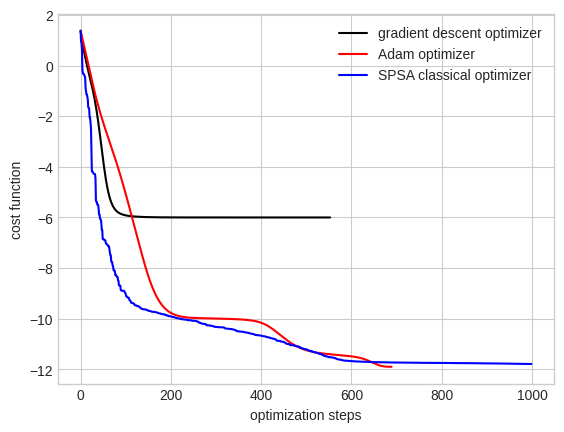

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.plot(GDO_list,"k",label="gradient descent optimizer")
plt.plot(Adam_list,"r", label = "Adam optimizer")
plt.plot(SPSA_list,"b", label = "SPSA classical optimizer")

plt.xlabel("optimization steps")
plt.ylabel("cost function")
plt.legend()
plt.show()

In [ ]:
def opt_func(opt,params,max_iterations = 500 ,step_size = 0.1,conv_tol = 1e-05):

## looping until convergence -------------------
  for n in range(max_iterations):

    # Take step
    params, prev_energy = opt.step_and_cost(cost_fn, params) # update params and energy
    energy = cost_fn(params) # stores current/ new energy value

    # Calculate difference between new and old energies
    conv = np.abs(energy - prev_energy)

    if n % 25 == 0:
      print("Iteration = {:}, Energy = {:.10f} Ha,  Convergence parameter = {:.8f} Ha".format(n, energy, conv))

    if conv <= conv_tol:
      break

  print("Loop ended at convergence value : ",conv)
  print("Final value of the energy = {:.8f} Ha".format(energy))
  print("Number of iterations = ", n)

  return  energy

In [ ]:
##### WE WILL REINITIALIZE THE PARAMS TO GET RID OF THE LOCAL MINIMA OPTIMIZATION PROBLEM
min_val =[]

max_iterations = 500 # maximum iterations
opt_SPSA = qml.SPSAOptimizer(maxiter= max_iterations)
min_val = [opt_func(opt_SPSA, parameters*np.ones(24),max_iterations = 500,conv_tol = 1e-15) for parameters in params]

Iteration = 0, Energy = 10.3350407139 Ha,  Convergence parameter = 0.43767513 Ha
Iteration = 25, Energy = -3.3172401915 Ha,  Convergence parameter = 0.07669451 Ha
Iteration = 50, Energy = -4.9898572039 Ha,  Convergence parameter = 0.01713056 Ha
Iteration = 75, Energy = -5.5967329348 Ha,  Convergence parameter = 0.00003021 Ha
Iteration = 100, Energy = -5.9939825498 Ha,  Convergence parameter = 0.03343945 Ha
Iteration = 125, Energy = -6.2918214288 Ha,  Convergence parameter = 0.00000756 Ha
Iteration = 150, Energy = -6.4082386557 Ha,  Convergence parameter = 0.00004897 Ha
Iteration = 175, Energy = -6.5908324114 Ha,  Convergence parameter = 0.00228862 Ha
Iteration = 200, Energy = -6.6989954381 Ha,  Convergence parameter = 0.00023860 Ha
Iteration = 225, Energy = -6.7721962598 Ha,  Convergence parameter = 0.00332780 Ha
Iteration = 250, Energy = -6.8024673562 Ha,  Convergence parameter = 0.00017739 Ha
Iteration = 275, Energy = -6.8243587619 Ha,  Convergence parameter = 0.00063711 Ha
Iteration

In [ ]:
np.shape(min_val)

(24,)

/usr/local/lib/python3.10/dist-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in log
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


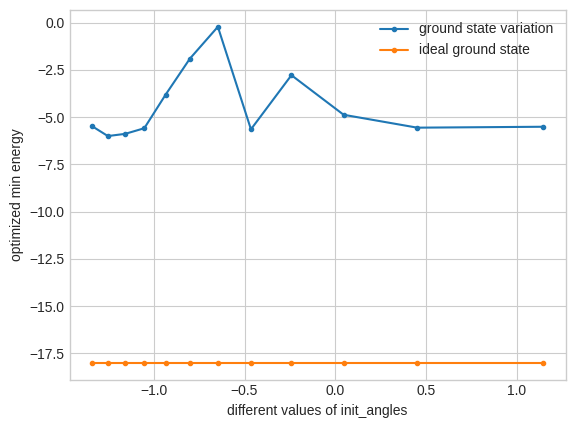

In [ ]:
plt.plot(np.log(np.sort(params)),np.array(min_val),label="ground state variation",marker=".")
plt.xlabel("different values of init_angles")
plt.ylabel("optimized min energy")

y = [-18]*len(params)
plt.plot(np.log(np.sort(params)),np.array(y),label = "ideal ground state",marker=".")

plt.legend()
plt.show()

Square

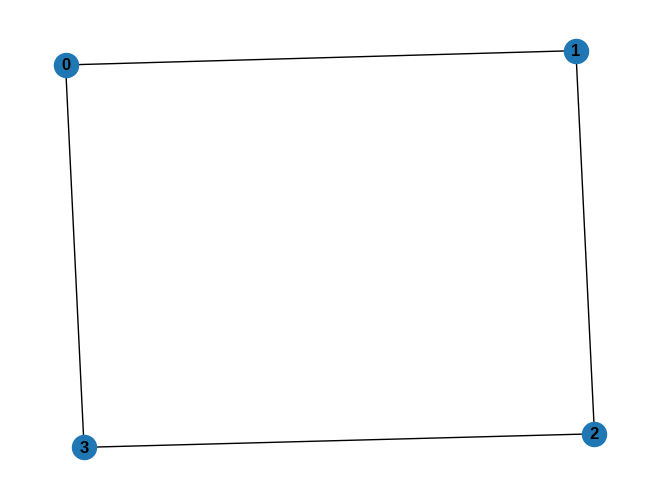

In [ ]:
########################## TRIANGLE

square = nx.Graph(((0, 1), (1, 2), (2, 3), (3,0)))
nx.draw(square, with_labels=True, font_weight='bold')
square_c = [1.0]*24

square_h, hamiltonian_mixer = maxcut(square)

In [ ]:
square_h
obs = []
coeffs = []

for edge in square.edges():
    coeffs.extend([1.0, 1.0, 1.0])
    obs.extend([qml.PauliX(edge[0]) @ qml.PauliX(edge[1]),
                        qml.PauliY(edge[0]) @ qml.PauliY(edge[1]),
                        qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])])
square_hamiltonian = qml.Hamiltonian(coeffs, obs)
print(square_hamiltonian)

square_qubits = len(square_hamiltonian.wires)
print("\n",square_qubits)

  (1.0) [X0 X1]
+ (1.0) [Y0 Y1]
+ (1.0) [Z0 Z1]
+ (1.0) [X0 X3]
+ (1.0) [Y0 Y3]
+ (1.0) [Z0 Z3]
+ (1.0) [X1 X2]
+ (1.0) [Y1 Y2]
+ (1.0) [Z1 Z2]
+ (1.0) [X2 X3]
+ (1.0) [Y2 Y3]
+ (1.0) [Z2 Z3]

 4


In [ ]:
angles = np.random.rand(4*2)
angles

tensor([0.45812783, 0.70980677, 0.36106079, 0.90497906, 0.46552219,
        0.6872459 , 0.2265241 , 0.29678045], requires_grad=True)

In [ ]:
dev1 = qml.device("lightning.qubit", wires=square_qubits)

def square_ansatz(angles):
  for it in range([:angles]):
    qml.RY(angle,wires=it)
  for i in range(num_qubits-1):
    qml.CNOT([i,i+1])
  for i in range(0,len(params),2):
    qml.RZ(params[i+1],wires=i//2)



print(qml.draw(square_ansatz)(angles))

SyntaxError: invalid syntax (<ipython-input-1-40aad9e5ac8a>, line 4)

#### Implementation of our Hamiltonian Variational Circuit **(HVA)** and bringing time evolution into the picture

We will use the grid mappings as advised by the paper [arXiv:2108.08086v2 [quant-ph]](https://arxiv.org/abs/2108.08086). We will use the grid patterns of **2X6**, **2X10** and **3X8**, implement these on a square lattice and independently work out the groud state energies based on the graph coloring patterns as advised in the paper.

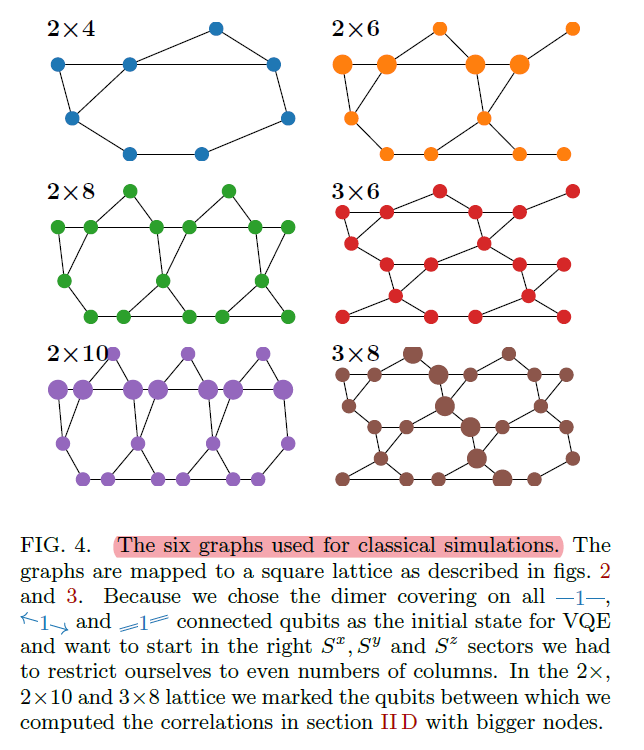